## 5. Functions

###  Sample Solutions 

Execute the following cell, to create the variables `a_1` - `a_4. `

In [1]:
a_1=[10, 39, 34, 35, 20, 32,  3,  9, 29, 35,  0, 27, 36, 40, 33,  5, 12, 24, 11, 50,  1,  7, 14, 22,  9]
a_2=[15,  2, 11, 16, 14,  1, 12, 14,  3,  7,  0,  4,  6, 13, 18, 19,  3,  9, 15, 16,  0, 19, 12, 13, 13]
a_3=[   4,   5,   1,   6,  3,  -3,  -6,  -1, -5,   -4]
a_4=["lizard","cat","mouse","bird","butterfly"];

### <p style='color: green'>easy</p>

#### Exercise 1 
Check all arrays for their length, print it and save the length of `a_1` in a variable.
#### Solution 1 

In [2]:
println(length(a_1))
println(length(a_2))
println(length(a_3))
println(length(a_4))
len_a_1 = length(a_1)

25
25
10
5


25

#### Exercise 2
Find the minimum and maximum of `a_1` and `a_3`, save them in variables.

#### Solution 2 

In [5]:
a_1_min = minimum(a_1)
a_1_max = maximum(a_1)
a_3_min = minimum(a_3)
a_3_max = maximum(a_3)


6

#### Exercise 3
Print the sentence: `"A_1 is x elements long. Its maximum is x and its minimum y."` In place of `x` and `y` add the actual values. Use your saved values.
#### Solution 3 

In [7]:
println("A_1 is $(len_a_1) elements long. Its maximum is $(a_1_max) and its minimum $(a_1_min)")


A_1 is 25 elements long. Its maximum is 50 and its minimum 0


#### Exercise 4
Sort `a_1` and `a_4`.
#### Solution 4 

In [10]:
println(a_1)
sort!(a_1)
println(a_1)
println(a_4)
sort!(a_4)
println(a_4)



[10, 39, 34, 35, 20, 32, 3, 9, 29, 35, 0, 27, 36, 40, 33, 5, 12, 24, 11, 50, 1, 7, 14, 22, 9]
[0, 1, 3, 5, 7, 9, 9, 10, 11, 12, 14, 20, 22, 24, 27, 29, 32, 33, 34, 35, 35, 36, 39, 40, 50]
["lizard", "cat", "mouse", "bird", "butterfly"]
["bird", "butterfly", "cat", "lizard", "mouse"]


### <p style='color: orange'>medium</p>

#### Exercise 5
You might have used `1:(length(array1))` in one of your loops, there is a better solution for this task. Search for the function `enumerate()`. Familiarize yourself with this function and use it to improve the following code:
````Julia
hansus = [1,5,8,2,7,8,3,2,8,2,9,7,4]
for i in 1:(length(hansus))
       println("The element with index $(i) is $(hansus[i])")
end
````
#### Solution 5

Enumerate combines the two ways (by index `for i in 1:(length(array))` or by element `for i in array`) to iterate over an object into one more compact notation.   http://www.jlhub.com/julia/manual/en/function/enumerate

In [15]:
hansus = [1,5,8,2,7,8,3,2,8,2,9,7,4]
for (i,x) in enumerate(hansus)
    println("The element with index $(i) is $(x)")
end

The element with index 1 is 1
The element with index 2 is 5
The element with index 3 is 8
The element with index 4 is 2
The element with index 5 is 7
The element with index 6 is 8
The element with index 7 is 3
The element with index 8 is 2
The element with index 9 is 8
The element with index 10 is 2
The element with index 11 is 9
The element with index 12 is 7
The element with index 13 is 4


#### Exercise 6
 Write & execute a function that take a number as argument multiplies it by `10` and prints the result.   
#### Solution 6

In [8]:
function number_multiplier(number)
    return number*10
end

number_multiplier (generic function with 1 method)

In [9]:
number_multiplier(5)

50

#### Exercise 7
Write & execute a function that asks to input a number, multiplies it by `10` and prints the result. The function should ask for more input till you type in: `stop`.

Hint: If you are struggling with that problem, take a look at the number guesser in the first jupyter notebook called "Julia_Notebooks".  
#### Solution 7

In [10]:
function number_input()
    while true
        input = IJulia.readprompt("Please input a number. Type stop to exit the programm")
        if input == "stop"
            println("Number Input Stops Now!")
            break
        end
        println(parse(Int64,input)*10)
    end
end

number_input (generic function with 1 method)

In [11]:
number_input()

Please input a number. Type stop to exit the programm 234


2340


Please input a number. Type stop to exit the programm stop


Number Input Stops Now!


#### Exercise 8
Install the package `Distributions` so that you are able to execute the following cell. What is the difference between `rand()` and `rand(Uniform(-1,1))`?
#### Solution 8

In [18]:
using Pkg
Pkg.add("Distributions")


    Updating registry at `C:\Users\ank10ki\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\ank10ki\Dropbox\phd\Courses\WS2022_Julia\Project.toml`
  No Changes to `C:\Users\ank10ki\Dropbox\phd\Courses\WS2022_Julia\Manifest.toml`


In [19]:
using Distributions

In [20]:
rand(10)


10-element Vector{Float64}:
 0.3312216929871378
 0.9819395875215967
 0.4740862980301105
 0.7087939445942885
 0.8589145629920404
 0.5143416824258369
 0.3761584704451022
 0.9906268765641554
 0.6058941144211373
 0.3256930172950582

Judging from the output above, the `rand()` function apparently samples positive `Float64` values smaller that 1. Let's take a look at the documentation of `rand()`:

In [21]:
?rand

search: rand randn transcode ZeroMeanDiagNormal ZeroMeanDiagNormalCanon



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref). When only one argument is passed besides the optional `rng` and is a `Tuple`, it is interpreted as a collection of values (`S`) and not as `dims`.

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2

julia> rand((2, 3))
3

julia> rand(Float64, (2, 3))
2×3 Array{Float64,2}:
 0.999717  0.0143835  0.540787
 0.696556  0.783855   0.938235
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and dense `BitSet`s. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


##### Even though it is a bit hidden in the documentation, the`rand()` samples Float64 values between 0 and 1 if it does not get a specific type or collection: 

- `S defaults to Float64`
- `for floating point numbers and to $[0, 1)`

Let's see what rand(Uniform(-1,1),10) does. 

In [22]:
rand(Uniform(-1,1),10)

10-element Vector{Float64}:
 -0.6770194252653687
 -0.05225627937311317
 -0.7695015650369457
  0.7982917039727306
  0.666794193062668
  0.3443911698179065
 -0.05059755880455885
 -0.3558957017409974
 -0.7613390611166952
 -0.8038713655165428

Judging from the output above, the `rand(Uniform(-1,1)` function apparently samples `Float64` values between -1 and 1. Let's take a look at the documentation of `Uniform`:

In [23]:
?Uniform

search: Uniform LogUniform DiscreteUniform



```
Uniform(a,b)
```

The *continuous uniform distribution* over an interval $[a, b]$ has probability density function

$$
f(x; a, b) = \frac{1}{b - a}, \quad a \le x \le b
$$

```julia
Uniform()        # Uniform distribution over [0, 1]
Uniform(a, b)    # Uniform distribution over [a, b]

params(d)        # Get the parameters, i.e. (a, b)
minimum(d)       # Get the lower bound, i.e. a
maximum(d)       # Get the upper bound, i.e. b
location(d)      # Get the location parameter, i.e. a
scale(d)         # Get the scale parameter, i.e. b - a
```

External links

  * [Uniform distribution (continuous) on Wikipedia](http://en.wikipedia.org/wiki/Uniform_distribution_(continuous))


And the judging was right as:
```julia
...
Uniform(a, b)    # Uniform distribution over [a, b]
...
```

#### Exercise 9
Use the `scatter(x,y)` function from the `CairoMakie` ploting package and make a scatter plot with the created values for x and y below. 
#### Solution 9

In [27]:
x = collect(1:100)
y = [ (x^1.2+x*0.5rand(Uniform(-1,1))+rand(Uniform(-1,1)*5)) for x in 1:100];

In [28]:
using CairoMakie

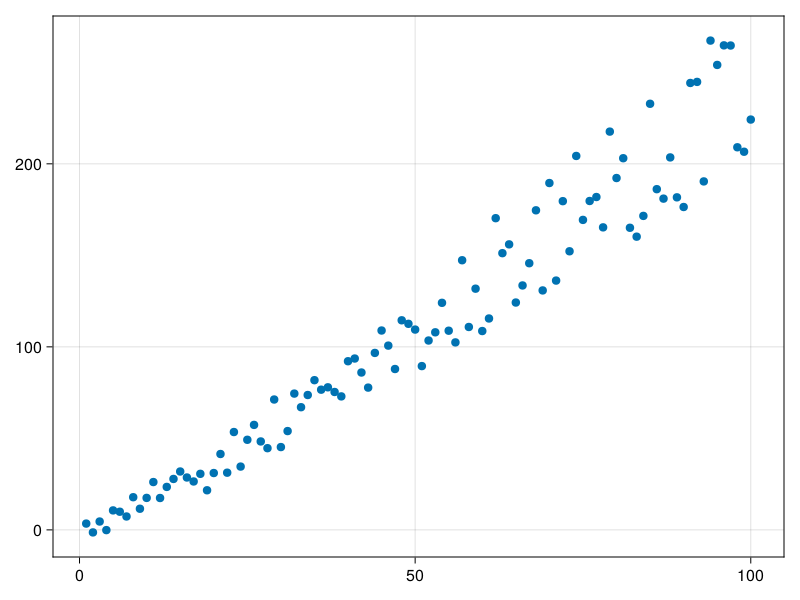

In [29]:
first_fig = scatter(x,y)

#### Exercise 10
Add a line plot to your scatter plot with the `lines!` function that plots x against y_truth.

Hint: The `lines!()` function adds a line to the last used plot, but does not give an output. If you want an output you should give your scatter plot (created by `scatter()`) a name and call it after it was modified
#### Solution 10

In [15]:
y_truth = [ x^1.2 for x in 1:100];

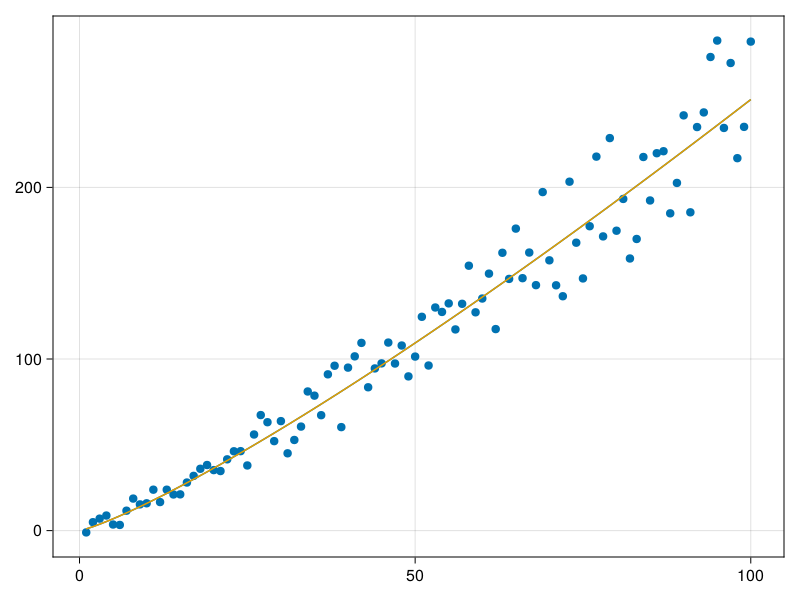

In [19]:
lines!(x, y_truth)
first_fig

### <p style='color: red'>hard</p>

#### Exercise 11
 Now you have a plot containing the measured data and the ground truth but not an error.  Take a look at the documentation of [Makies errorbar](https://makie.juliaplots.org/stable/examples/plotting_functions/errorbars/) and add errorbars to every plotted point of the measured data with the mutating `errorbar!()` function. 

#### Solution 11

In [30]:
y_error = [0.5*x+5 for x in 1:100];

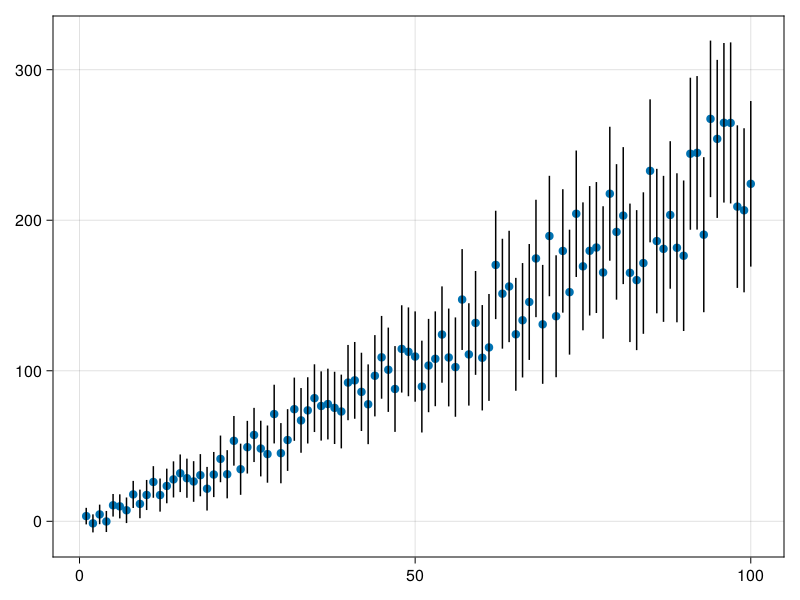

In [31]:
errorbars!(x,y,y_error)
first_fig

#### Exercise 12
Read the section of the Julia documentation regarding `Varargs Functions` (https://docs.julialang.org/en/v1/manual/functions/#Varargs-Functions). Write your own function with variable arguments. The function should perform various calculations:
- It should take two numbers and any count of additional numbers
- It should sum up all arguments
- A switch should allow to instead multiply all arguments.
- If less then 2 numbers are provided an error message should be provided
#### Solution 12

In [32]:
function my_nice_function(x... ; operation = "plus")
    if length(x) < 2
        return("ERROR ERROR ERROR!!! Needs at least two numbers as arguments!")
    else 
        if operation == "plus"
            return sum(x)
        elseif operation == "prod"
            return prod(x)
        else 
            println("ERROR ERROR ERROR!!! Invalid operation")
        end
    end
end
    

my_nice_function (generic function with 1 method)

In [11]:
my_nice_function(2,1)

3

In [12]:
my_nice_function(2,1; operation = "prod")

2

In [18]:
my_nice_function(2,2,10,24,10;operation = "prod")

9600

In [20]:
my_nice_function(12,21,12,123,123,676,34,43)

1044

#### Exercise 13
Write & execute a function, that processes an array. The function should test if the array is filled with numbers or strings:
- If the array contains either only numbers or strings. Two different things should be calculated and printed: 
    - If it is a array of numbers, the minimum and maximum
    - If it is a array of strings, sort it by length.
- If the array contains both numbers and strings (or anythingelse) an error message should be displayed.
#### Solution 13

Warning: 
This sample solution is written in a very compact manner. It is possible to solve this exercise with loops in a longer but less elegant way. But, when you advance in programming, you will encounter compact code like this. Therefore, it is a good exercise to understand how it works. If you have troubles, advance step by step: 

Copy and past single operations like `(Float64 .== typeof.(array))` into a separate cell, execute it and inspect its return value to understand its inner workings.  

In [46]:
# This solution is written on purpose in a very compact manner. This  If you are confused 
# about the complex if and elseif conditions  

function test_array(array)
    if sum(String .== typeof.(array)) == length(array)
        println(sort(array, by= x->length(x)))
    elseif sum((Float64 .== typeof.(array)).+(Int64 .== typeof.(array))) == length(array)
        println("The minimum is $(minimum(array)) and the maximum is $(maximum(array)).")
    else
        println("ERROR ERROR ERROR!!! The array contains datatypes where no behaviour is defined")
    end
end

test_array (generic function with 1 method)

In [47]:
test_array([1,3,3.0,5.0])

The minimum is 1.0 and the maximum is 5.0.


In [48]:
test_array(["d", "jens", "apple","hans-peter","zz"])

["d", "zz", "jens", "apple", "hans-peter"]


In [49]:
test_array(["hans",1])

ERROR ERROR ERROR!!! The array contains datatypes where no behaviour is defined


In [50]:
test_array([2,2,[21,12.1]])

ERROR ERROR ERROR!!! The array contains datatypes where no behaviour is defined
